# Decision Tree (Monkeypox Disease Prediction)

## Explanation

### Objective

created a machine learning model that can predict whether a person has monkeypox disease or not, using the Decision Tree algorithm.

### Column Descriptions

- **Patient_ID** = Unique identifier for each patient.
- **Systemic Illness** = The primary systemic symptom exhibited (Fever, Swollen Lymph Nodes, Muscle Aches and Pain, None).
- **Rectal Pain** = Binary feature indicating presence of rectal pain (False / True).
- **Sore Throat** = Binary feature indicating presence of sore throat (False / True).
- **Penile Oedema** = Binary feature indicating presence of penile swelling (False / True).
- **Oral Lesions** = Binary feature indicating presence of lesions in the mouth (False / True).
- **Solitary Lesion** = Binary feature indicating presence of a single lesion (False / True).
- **Swollen Tonsils** = Binary feature indicating swelling of the tonsils (False / True).
- **HIV Infection** = Binary feature indicating if the patient has HIV (False / True).
- **Sexually Transmitted Infection** = Binary feature indicating presence of other STIs (False / True).
- **MonkeyPox** = Target variable indicating if the patient is positive for Monkeypox (Positive, Negative)

## A. Data Preparation

### A.1 Import Libraries

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### A.2 Load Data

In [137]:
try:
    df = pd.read_csv('monkeypox.csv')
    print("Berhasil Membaca Data")
except Exception as e:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Viewing Data Dimensions

In [138]:
df.shape

(25000, 11)

### A.4 Viewing Data Informations

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                18784 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


### A.5 Viewing Data Statistics

In [140]:
df_numeric = df.select_dtypes(include=['bool']).astype(int)
df_numeric.describe().T.style.format("{:.2f}").background_gradient(cmap='flare')

,count,mean,std,min,25%,50%,75%,max
Rectal Pain,25000.00,0.49,0.50,0.00,0.00,0.00,1.00,1.00
Sore Throat,25000.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00
Penile Oedema,25000.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00
Oral Lesions,25000.00,0.50,0.50,0.00,0.00,0.00,1.00,1.00
Solitary Lesion,25000.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00
Swollen Tonsils,25000.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00
HIV Infection,25000.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00
Sexually Transmitted Infection,25000.00,0.50,0.50,0.00,0.00,0.00,1.00,1.00


### A.6 Viewing Top 5 Data and Bottom 5 Data

In [141]:
df.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,NaN,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,NaN,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [142]:
df.tail()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
24995,P24995,NaN,True,True,False,True,True,False,False,True,Positive
24996,P24996,Fever,False,True,True,False,True,True,True,True,Positive
24997,P24997,NaN,True,True,False,False,True,True,False,False,Positive
24998,P24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False,Negative
24999,P24999,Swollen Lymph Nodes,False,False,True,False,False,True,True,False,Positive


### A.7 Viewing Duplicated Data

In [143]:
df.duplicated().sum()

np.int64(0)

### A.8 Viewing Missing Data

In [144]:
df.isna().sum()

Patient_ID                           0
Systemic Illness                  6216
Rectal Pain                          0
Sore Throat                          0
Penile Oedema                        0
Oral Lesions                         0
Solitary Lesion                      0
Swollen Tonsils                      0
HIV Infection                        0
Sexually Transmitted Infection       0
MonkeyPox                            0
dtype: int64

### A.9 Viewing Outliers Data

#### NO OUTLIERS (Because The Data Is Boolean)

## B. Data Preprocessing

### B.1 Drop Unrelated Columns

In [145]:
df.columns

Index(['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat',
       'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils',
       'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox'],
      dtype='object')

In [146]:
df = df.drop(columns=['Patient_ID'])

### B.2 Mapping Features

#### Boolean Mapping

In [147]:
bool_cols = ['Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 
             'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection']

for col in bool_cols:
    df[col] = df[col].astype(bool).astype(int)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Systemic Illness                18784 non-null  object
 1   Rectal Pain                     25000 non-null  int64 
 2   Sore Throat                     25000 non-null  int64 
 3   Penile Oedema                   25000 non-null  int64 
 4   Oral Lesions                    25000 non-null  int64 
 5   Solitary Lesion                 25000 non-null  int64 
 6   Swollen Tonsils                 25000 non-null  int64 
 7   HIV Infection                   25000 non-null  int64 
 8   Sexually Transmitted Infection  25000 non-null  int64 
 9   MonkeyPox                       25000 non-null  object
dtypes: int64(8), object(2)
memory usage: 1.9+ MB


#### Object Mapping

In [149]:
df['Systemic Illness'].unique()

array([nan, 'Fever', 'Swollen Lymph Nodes', 'Muscle Aches and Pain'],
      dtype=object)

In [150]:
df['Systemic Illness'] = df['Systemic Illness'].fillna("None")

In [151]:
illness_mapping = {"None" : 0, 'Fever' : 1, 'Swollen Lymph Nodes' : 2, 'Muscle Aches and Pain' : 3}
df['Systemic Illness'] = df['Systemic Illness'].map(illness_mapping)

In [152]:
df['Systemic Illness'].unique()

array([0, 1, 2, 3])

### B.3 Mapping Label

In [153]:
monkeypox_mapping = {"Negative" : 0, "Positive" : 1}
df['MonkeyPox_Sign'] = df['MonkeyPox'].map(monkeypox_mapping)

In [154]:
df['MonkeyPox_Sign'].unique()

array([0, 1])

### B.4 Feature Engineering

#### Creating New Column

Total Symptoms

In [155]:
illness_cols = ['Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 
             'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection']

df['Total Symptoms'] = df[illness_cols].sum(axis=1)

In [156]:
df.head()

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,MonkeyPox_Sign,Total Symptoms
0,0,0,1,1,1,0,1,0,0,Negative,0,4
1,1,1,0,1,1,0,0,1,0,Positive,1,4
2,1,0,1,1,0,0,0,1,0,Positive,1,3
3,0,1,0,0,0,1,1,1,0,Positive,1,4
4,2,1,1,1,0,0,1,1,0,Positive,1,5


## C. Exploratory Data Analysis (EDA)

### C.1 Univariate Analysis

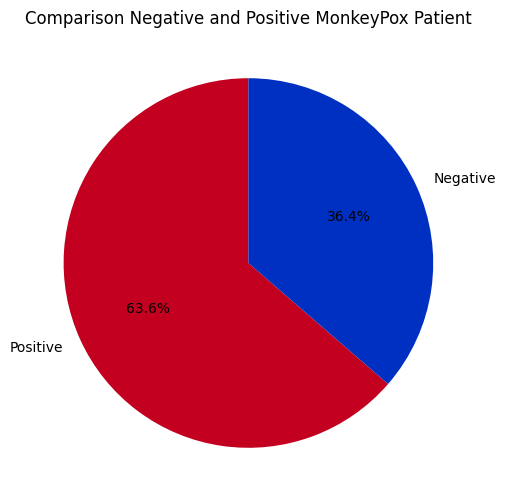

In [157]:
plt.figure(figsize=(6, 6))
df['MonkeyPox'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=["#c30020", "#0030c1"])
plt.title("Comparison Negative and Positive MonkeyPox Patient")
plt.ylabel(None)
plt.show()

### C.2 Bivariate Analysis

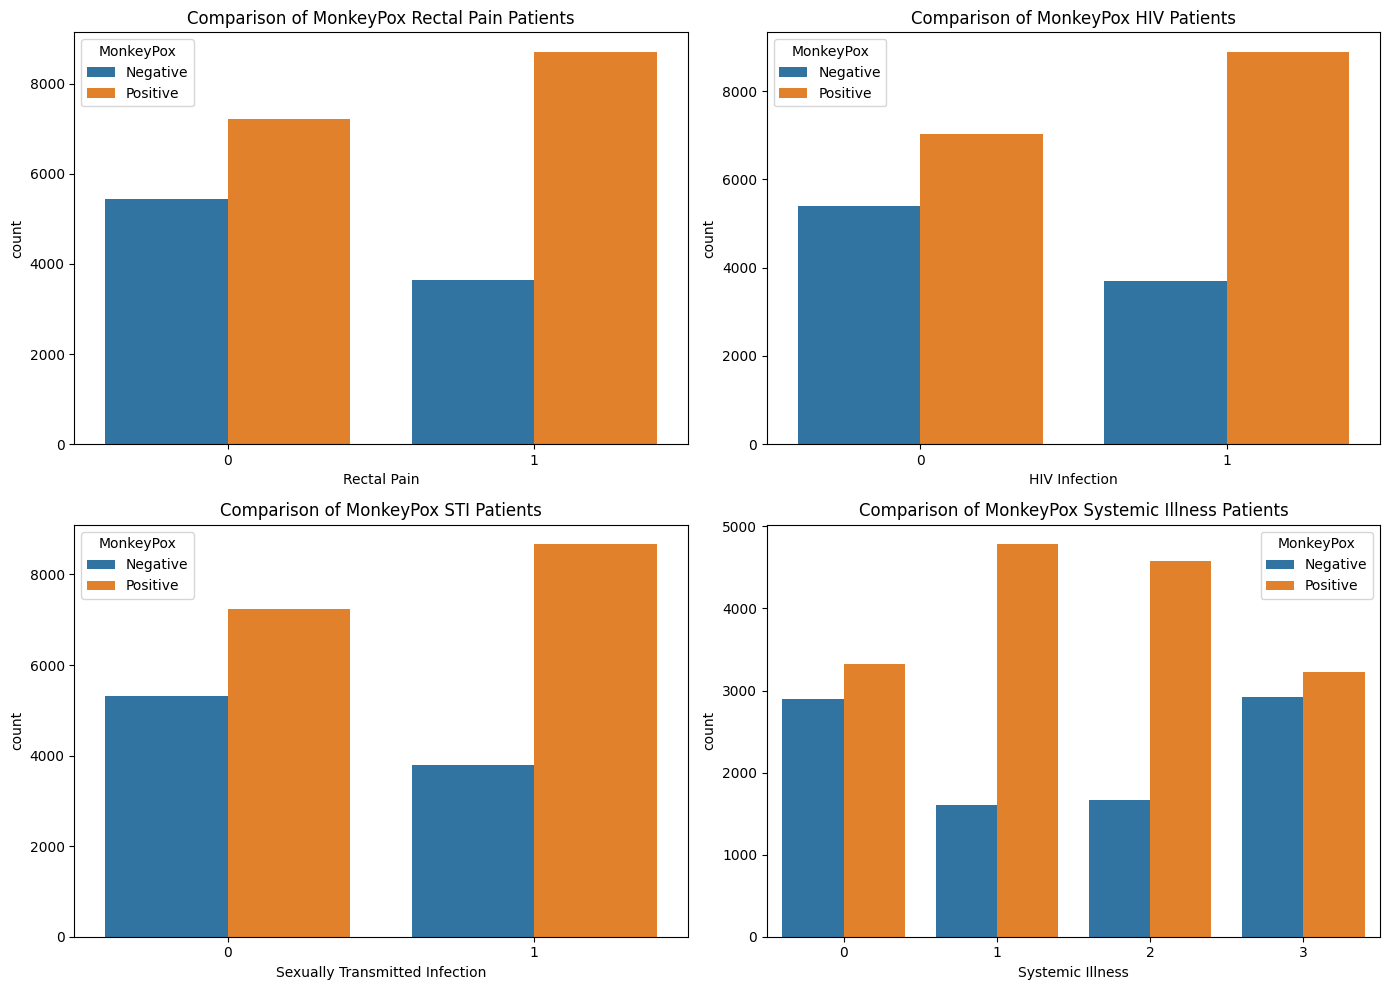

In [158]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.countplot(x='Rectal Pain', data=df, hue='MonkeyPox', ax=axes[0, 0])
axes[0, 0].set_title("Comparison of MonkeyPox Rectal Pain Patients")

sns.countplot(x='HIV Infection', data=df, hue='MonkeyPox', ax=axes[0, 1])
axes[0, 1].set_title("Comparison of MonkeyPox HIV Patients")

sns.countplot(x='Sexually Transmitted Infection', data=df, hue='MonkeyPox', ax=axes[1, 0])
axes[1, 0].set_title("Comparison of MonkeyPox STI Patients")

sns.countplot(x='Systemic Illness', data=df, hue='MonkeyPox', ax=axes[1, 1])
axes[1, 1].set_title("Comparison of MonkeyPox Systemic Illness Patients")

plt.tight_layout()
plt.show()

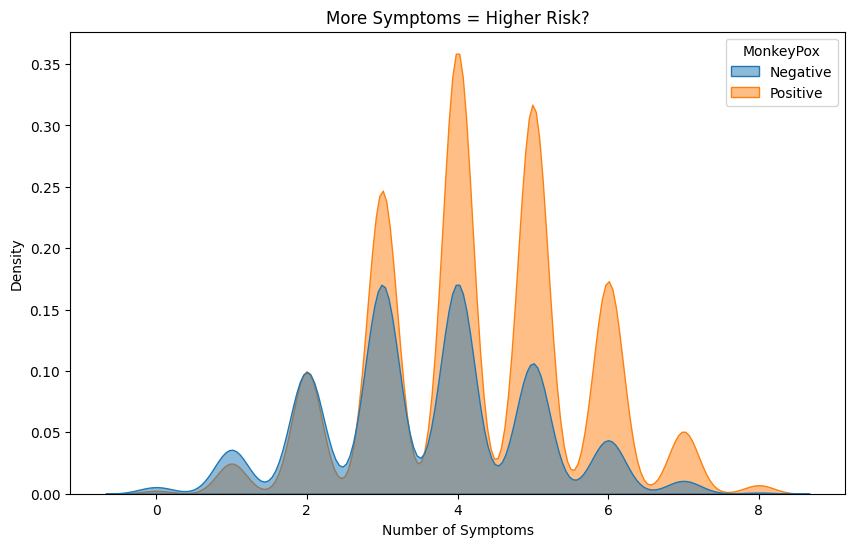

In [159]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df, x='Total Symptoms', hue='MonkeyPox', fill=True, alpha=0.5)

plt.title('More Symptoms = Higher Risk?')
plt.xlabel('Number of Symptoms')
plt.show()

### C.3 Multivariate Analysis

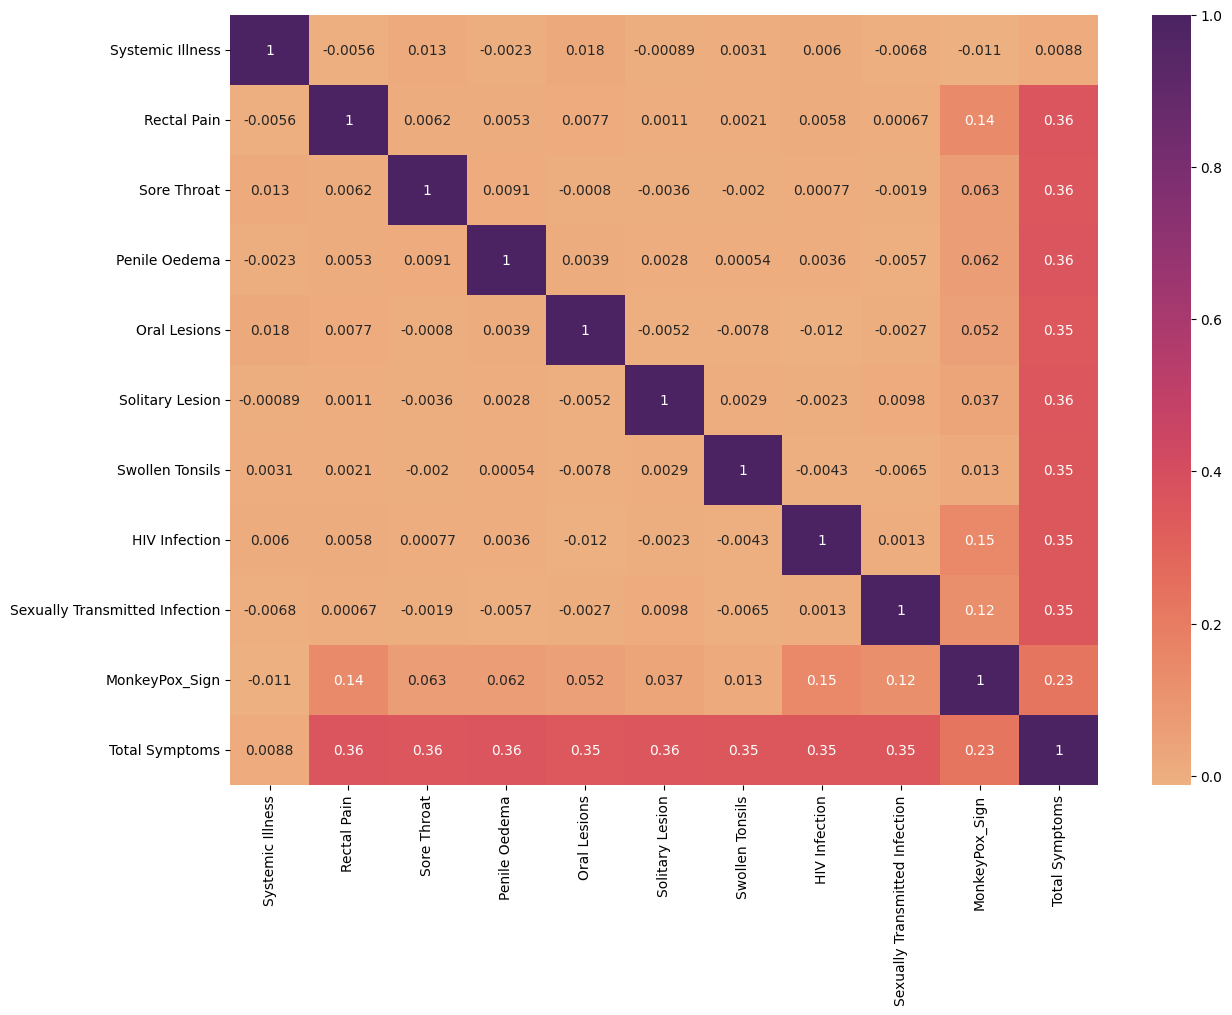

In [160]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='flare')
plt.show()

## D. Modelling

### D.1 Defining X (Features) and y (Target) Variables

In [161]:
X_data = df.drop(columns=['MonkeyPox', 'MonkeyPox_Sign'])
y_data = df['MonkeyPox_Sign']

### D.2 Splitting Train Data and Test Data (80:20)

In [162]:
def stratified_split(x_data, y_data, train_size = 0.8, random_state = 42):
    np.random.seed(random_state)
    
    x_train_list, x_test_list = [], []
    y_train_list, y_test_list = [], []
    
    for class_value in np.unique(y_data):
        class_idx = np.where(y_data == class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        x_train_list.append(x_data.iloc[idx[:split_ratio]])
        x_test_list.append(x_data.iloc[idx[split_ratio:]])
        y_train_list.append(y_data.iloc[idx[:split_ratio]])
        y_test_list.append(y_data.iloc[idx[split_ratio:]])
        
    x_train = pd.concat(x_train_list).reset_index(drop = True)
    x_test = pd.concat(x_test_list).reset_index(drop = True)
    y_train = pd.concat(y_train_list).reset_index(drop = True)
    y_test = pd.concat(y_test_list).reset_index(drop = True)
    
    return x_train, x_test, y_train, y_test
X_train, X_test, y_train, y_test = stratified_split(X_data, y_data)

### D.3 Decision Tree

#### Calculate Gini Impurity

In [163]:
def calculate_gini(groups, classes):
    n_instances = float(sum([len(group) for group in groups]))
    gini = 0.0
    
    for group in groups:
        size = float(len(group))
        if size == 0:
            continue
        
        group_y = group.iloc[:, -1]
        
        proportions = group_y.value_counts(normalize=True)
        
        # Gini Impurity Formula: 1 - sum(p^2)
        score = (proportions ** 2).sum()
        
        # Group Weighted Gini
        gini += (1.0 - score) * (size / n_instances)
        
    return gini

#### Splitting Data

In [164]:
def split_data(df, feat_idx, threshold):
    
    left = df[df.iloc[:, feat_idx] < threshold]
    right = df[df.iloc[:, feat_idx] >= threshold]
    
    return left, right

#### Finding Best Split

In [165]:
def get_best_split(df, classes):
    best_gini = float('inf')
    best_split = {} 
    
    n_features = df.shape[1] - 1
    
    for feat_idx in range(n_features):
        
        unique_values = df.iloc[:, feat_idx].unique()
        unique_values.sort()
        
        for threshold in unique_values:
            # Skip the split if the threshold is the maximum value in the column
            if threshold == unique_values[-1]:
                continue
                
            # Attempt to split the dataset using the current feature and threshold
            groups = split_data(df, feat_idx, threshold)
            
            # Skip if the split is invalid (i.e., one of the resulting groups is empty)
            if len(groups[0]) == 0 or len(groups[1]) == 0:
                continue
            
            # Calculate the Gini Impurity for this candidate split
            gini = calculate_gini(groups, classes)
            
            if gini < best_gini:
                best_gini = gini
                best_split = {
                    'feat_idx': feat_idx,
                    'val': threshold,
                    'groups': groups
                }
                
    return best_split

#### Building Tree (Recursive)

In [166]:
def to_terminal(group):
    return group.iloc[:, -1].mode()[0]

def build_tree(df, classes, depth, max_depth, min_samples=10):
    if len(df) < min_samples:
        return to_terminal(df)
    
    root = get_best_split(df, classes)
    
    # Check if a valid split exists (if root is empty, make it a leaf)
    if not root:
        return to_terminal(df)

    # Retrieve left and right split results
    left, right = root['groups']
    del(root['groups'])
    
    # Check Stop Conditions
    # A. If one side is empty
    if len(left) == 0 or len(right) == 0:
        no_split_data = pd.concat([left, right])
        root['left'] = root['right'] = to_terminal(no_split_data)
        return root
    
    # B. If the maximum tree depth is reached
    if depth >= max_depth:
        root['left'] = to_terminal(left)
        root['right'] = to_terminal(right)
        return root

    # 3. Recursion: Build sub-trees for Left and Right branches
    root['left'] = build_tree(left, classes, depth + 1, max_depth, min_samples)
    root['right'] = build_tree(right, classes, depth + 1, max_depth, min_samples)
    
    return root

#### Predict

In [167]:
def predict_row(node, row):
    if not isinstance(node, dict):
        return node
    
    # Recursive Step: Check the feature value against the threshold
    if row.iloc[node['feat_idx']] < node['val']:
        # Go to the Left Branch
        return predict_row(node['left'], row)
    else:
        # Go to the Right Branch
        return predict_row(node['right'], row)

def predict_batch(tree, df_test):
    return df_test.apply(lambda row: predict_row(tree, row), axis=1).tolist()

### D.4 Decision Tree Prediction

In [168]:
train_data = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

unique_classes = y_train.unique()

print("Training Decision Tree... (This might take a moment)")
my_tree = build_tree(train_data, unique_classes, depth=0, max_depth=10, min_samples=20)

print("Predicting Test Data...")
test_predictions = predict_batch(my_tree, X_test)
train_predictions = predict_batch(my_tree, X_train)

print("Done!")

Training Decision Tree... (This might take a moment)
Predicting Test Data...
Done!


## E. Evaluation

### E.1 Model Accuracy

#### Test Accuracy

In [169]:
test_accuracy = np.mean(test_predictions == y_test)
print(f"{test_accuracy:.2f}")

0.67


#### Train Accuracy

In [170]:
train_accuracy = np.mean(train_predictions == y_train)
print(f"{train_accuracy:.2f}")

0.67


### E.2 Confusion Matrix

In [171]:
pred_array = np.array(test_predictions)
test_array = np.array(y_test)

TP = np.sum((pred_array == 1) & (test_array == 1))
FP = np.sum((pred_array == 1) & (test_array == 0))
FN = np.sum((pred_array == 0) & (test_array == 1))
TN = np.sum((pred_array == 0) & (test_array == 0))

print(f"True Positives: {TP}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Negatives: {TN}")

True Positives: 2980
False Positives: 1463
False Negatives: 202
True Negatives: 356


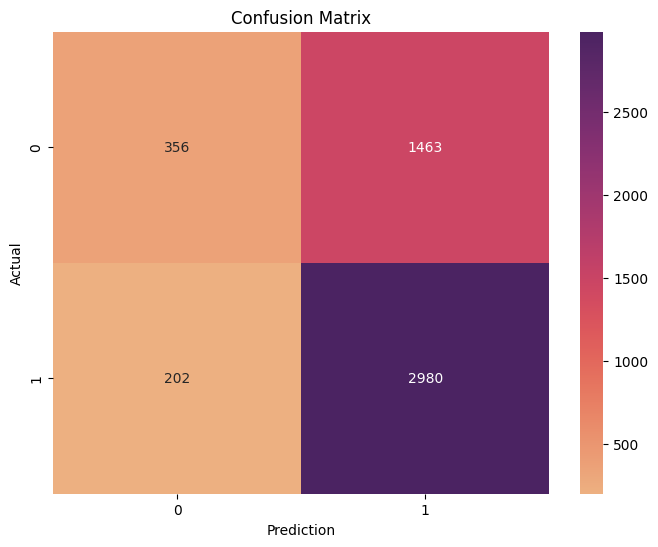

Class: Negative
True Positives: 356
False Positives: 202
False Negatives: 1463
True Negatives: 2980

Class: Positive
True Positives: 2980
False Positives: 1463
False Negatives: 202
True Negatives: 356



In [172]:
confusion_matrix = pd.crosstab(y_test, test_predictions, rownames=['Actual'], colnames=['Prediction'])
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True, cmap='flare', fmt='d')
plt.title("Confusion Matrix")
plt.show()

cm_array = confusion_matrix.values
TP = np.diag(cm_array)
FP = np.sum(cm_array, axis=0) - TP
FN = np.sum(cm_array, axis=1) - TP
TN = np.sum(cm_array) - (TP + FP + FN)

class_names = confusion_matrix.columns
for i, name in enumerate(class_names):
    if name == 0:
        classes = "Negative"
    else:
        classes = "Positive"
        
    print(f"Class: {classes}")
    print(f"True Positives: {TP[i]}")
    print(f"False Positives: {FP[i]}")
    print(f"False Negatives: {FN[i]}")
    print(f"True Negatives: {TN[i]}\n")

### E.3 Precision

In [173]:
precision = TP / (TP + FP)
precision = np.mean(precision)
print(f"{precision:.2f}")

0.65


### E.4 Recall

In [174]:
recall = TP / (TP + FN)
recall = np.mean(recall)
print(f"{recall:.2f}")

0.57


### E.5 F-1 Score

In [175]:
f1 = 2 * (precision * recall) / (precision + recall)
print(f"{f1:.2f}")

0.61
